<a href="https://colab.research.google.com/github/vionakaleb/colab-python/blob/main/Traffic_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset (assuming 'data' is a DataFrame)
# Preprocess the data as needed
# Load the dataset
data = pd.read_csv('traffic.csv')

# Display first rows
print(data.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [ ]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')

# Feature engineering
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month

In [ ]:
print(data, 'data')

# Select features and target variable
features = ['Hour', 'DayOfWeek', 'Month']
target = ['Vehicles']

# Scale the features and target variable
scaler = MinMaxScaler()
data[features + target] = scaler.fit_transform(data[features + target])

                 DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
0     2015-11-01 00:00:00         1        15  20151101001     0          6   
1     2015-11-01 01:00:00         1        13  20151101011     1          6   
2     2015-11-01 02:00:00         1        10  20151101021     2          6   
3     2015-11-01 03:00:00         1         7  20151101031     3          6   
4     2015-11-01 04:00:00         1         9  20151101041     4          6   
...                   ...       ...       ...          ...   ...        ...   
48115 2017-06-30 19:00:00         4        11  20170630194    19          4   
48116 2017-06-30 20:00:00         4        30  20170630204    20          4   
48117 2017-06-30 21:00:00         4        16  20170630214    21          4   
48118 2017-06-30 22:00:00         4        22  20170630224    22          4   
48119 2017-06-30 23:00:00         4        12  20170630234    23          4   

       Month  
0         11  
1         11  
2     

In [ ]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Reshape data for LSTM input
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train)

[[[0.         1.         0.90909091]]

 [[0.04347826 1.         0.90909091]]

 [[0.08695652 1.         0.90909091]]

 ...

 [[0.91304348 0.16666667 0.90909091]]

 [[0.95652174 0.16666667 0.90909091]]

 [[1.         0.16666667 0.90909091]]]


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1203/1203 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.0024 - val_loss: 0.0104 - val_accuracy: 0.0058
Epoch 2/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.0133 - accuracy: 0.0024 - val_loss: 0.0102 - val_accuracy: 0.0058
Epoch 3/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.0132 - accuracy: 0.0024 - val_loss: 0.0093 - val_accuracy: 0.0058
Epoch 4/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.0131 - accuracy: 0.0024 - val_loss: 0.0107 - val_accuracy: 0.0058
Epoch 5/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.0130 - accuracy: 0.0024 - val_loss: 0.0083 - val_accuracy: 0.0058
Epoch 6/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.0130 - accuracy: 0.0024 - val_loss: 0.0104 - val_accuracy: 0.0058
Epoch 7/20
1203/1203 [==============================] - 5s 4ms/step - loss: 0.0130 - accuracy: 0.0024 - val_loss: 0.0106 - val_accuracy:

In [ ]:
# Predict using the trained model
p = model.predict(X_test)

scores = model.evaluate(X_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} ] [ {r1:.2f} {r2:.2f} ]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], r1=y[i,0], r2=y[i,1])) #80-95%

# Inverse transform the predictions to the original scale
p = scaler.inverse_transform(p)

301/301 [==============================] - 2s 5ms/step
[[0.13794884]
 [0.1195032 ]
 [0.10865752]
 ...
 [0.20394182]
 [0.20468116]
 [0.20332852]]


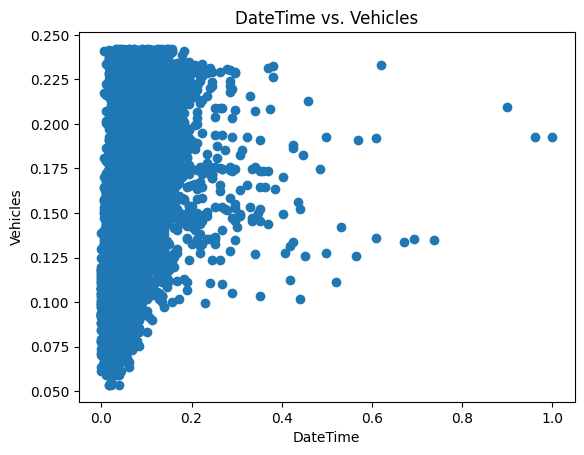

In [ ]:
# Visualize the model
plt.scatter(y_test, p)
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.title('DateTime vs. Vehicles')
plt.show()

In [ ]:
model.summary()